# <center> Module 2

Group: 12<br>
Darko Petrov<br>
Alexander Lendon

### <center> Q1.


#### 1.
The equality constraint was defined as 
$$
y_t(\theta^Tx_t+\mu)<0
$$
so we would like to minimise this term to find the optimal solution.
$$
\min_{(\theta,\mu),(z_i\in \Reals)} \sum^n_{t=1}l(z_t)+\frac{\alpha}{2}||\theta||^2_2\\
s.t.\\
z_t= y_t(\theta^Tx_t+ \mu)
$$
To obtain the lagarangian function one must introduce lagrange multipliers to the equality constraints. 
Bringing in the equality constraint and multiplying by the lagrange multiplier $\lambda_t$ associated with the ith equality constraint.
$$
\mathcal{L}(\theta,\mu,\{z_i\in \Reals\},\lambda) = \sum^n_{t=1}l(z_t)+\frac{\alpha}{2}||\theta||^2_2 + \sum^n_{t=1}\lambda_t(z_t - y_t(\theta^Tx_t+ \mu))
$$

In satisfying slaters condition, a point where conditions that satisfy strong duality must exist. At this point the solutions to the primal and dual problems are equal. A point where these conditions are met (all inequality constrains are satisfied) is in the interior of the feasible set.
Therefore if we introduce this point for $\lambda \geq 0$:
$$
g(\lambda)\leq p^*
$$
For some feasible point $\bar{z}$ the lagragian dual function therfore satisfies
$$
g(\lambda) =\sum^n_{t=1}\lambda_t(\bar{z}-\bar{y}(\theta^T\bar{x}+\mu)) \leq 0
$$

and so the following condition is satisfied.
$$
l(\bar{z})+\frac{\alpha}{2}||\theta||^2_2 + \sum^n_{t=1}\lambda_t(\bar{z} - y_t(\theta^Tx_t+ \mu)) 
\leq 
l(\bar{z})+\frac{\alpha}{2}||\theta||^2_2
$$
Or the original minimisation for the primal solution is always larger than the dual solution.

$$
\min_{(\theta, \mu)}\sum^n_{i=1}\ell(y_i(\theta^Tx_i+\mu))+\frac{\alpha}{2}||{\theta}||^2_2
$$

$$
\ell(z) = log(1+e^z)
$$

$$
\ell(z) = \{0    z<0 \\ z z\geq 0 \}
$$

$$
\min_{(\theta, \mu),\{z\in \real\}} \sum^n_{i=1} \ell(z_i) + \frac{\alpha}{2}||\theta||^2_2
$$

#### 2.
The lagrangian min-max for the primal problem can be written as
$$
\min_z\max_\lambda\mathcal{L}((\theta,\mu),z,\lambda) = \left(
\min_z\max_\lambda\sum_{i=1}^n l(z_i)+
\frac{\alpha}{2}||\theta||^2_2 - 
\sum_{i=1}^n\lambda_i(y_i(\theta^Tx_i+\mu)-z_i)
\right)
$$
The lagrange duality theorem establishes a relationship between the primal and the dual functions. This equality is strong dualityand holds under convexityand if a feasible point x exists. It is defined as:
$$
\min_z\max_\lambda\mathcal{L}((\theta,\mu),z,\lambda) = \max_\lambda\min_z\mathcal{L}((\theta,\mu),z,\lambda)
$$
We now great afunction $g(\lambda)$ that represents the minimisation of the function $\mathcal{L}$ with respect to z.
$$
g(\lambda) = \min_z\left(
    \sum_{i=1}^n l(z_i)+
    \frac{\alpha}{2}||\theta||^2_2 - 
    \sum_{i=1}^n\lambda_i(y_i(\theta^Tx_i+\mu)-z_i)
\right)
$$
Which then means we can express the maxmin function as
$$
\max_\lambda\min_z\mathcal{L}((\theta,\mu),z,\lambda) = 
\max_\lambda g(\lambda)
$$
Then we can substitute the convex conjugate $l^*(a)$ for $l(z)$ using:
$$
l^*(a)=\sup_{a\in \text{dom}\,l}(a^Tz-l(z))
$$
resulting in the new expression for g
$$
g(\lambda) = \inf_z\left(
    \sum_{i=1}^n (a^Tz-l^*(a))+
    \frac{\alpha}{2}||\theta||^2_2 - 
    \sum_{i=1}^n\lambda_i(y_i(\theta^Tx_i+\mu)-z_i)
\right)
$$



<!-- $$
g(\lambda) = 
\begin{cases}
\text{inf}_x \sum_{i=1}^n l(z_i)& \\
-\inf&  
\end{cases}
$$ -->

<!-- $$
\min_{\theta,\mu,z}\max_{\lambda} \mathcal{L}(\theta,\mu,z,\lambda)
$$
$$
\min_{\lambda}(l^*(\lambda_i)+\frac{1}{2\alpha}\sum_{i=1}^n)
$$ -->

#### 3.
The convex conjugate of a function is defined as 
$$
l^*(a)=\sup_{a\in \text{dom}\,l}(a^Tz-f(z))
$$

##### a)
The function for logistic loss is given by:
$$
l(z) = log(1+e^z)
$$
Therefore the convex conjugate function is given by
$$
l^*(a) = \sup_{a\in \text{dom}\,l}(a^Tz - log(1+e^z))
$$
the maximum of this is found by taking the derivative with respect to z and setting this to zero.
$$
\frac{\partial l^*(a)}{\partial z} = a^t - \frac{e^z}{1+e^z} = 0
$$
Rearrange for z
$$
z = \log(\frac{a^T}{1-a^T})
$$
Substitute this maximum condition into $l^*(z)$
$$
l^*(z) =a^T\log(\frac{a^T}{1-a^T})-\log(1+e^{\log(\frac{a^T}{1-a^T})})
$$
$$
l^*(z) =a^T\log(a^T)
$$


##### b)
The hinge loss function is given by:
$$
l(z)=\begin{cases}
0 & z<0 \\
z & z \geq 0
\end{cases}
$$
So calculating the convex conjugate of this function
$$
l^*(a) = \sup_{a\in \text{dom}\, l}
\begin{cases}
a^Tz & z<0 \\
a^Tz-z & z \geq 0
\end{cases}
$$
Taking derivative respect to zto find the maxima
$$
\frac{\partial}{\partial z}l^*(a) = \sup_{a\in \text{dom}\, l}
\begin{cases}
a^T & z<0 \\
a^T-1 & z \geq 0
\end{cases}
$$
Setting equal to zero gives:
$$
a=
\begin{cases}
 0 & z<0 \\
 1 & z \geq 0
\end{cases}
$$
Sub into $l^*(a)$
$$
l^*(a) = 
\begin{cases}
z & z<0 \\
0 & z \geq 0
\end{cases}
$$


C:\Users\lendo\AppData\Local\Temp\ipykernel_14144\298795117.py:7: RuntimeWarning: divide by zero encountered in log
  l_conv = a * np.log(a)
C:\Users\lendo\AppData\Local\Temp\ipykernel_14144\298795117.py:7: RuntimeWarning: invalid value encountered in multiply
  l_conv = a * np.log(a)


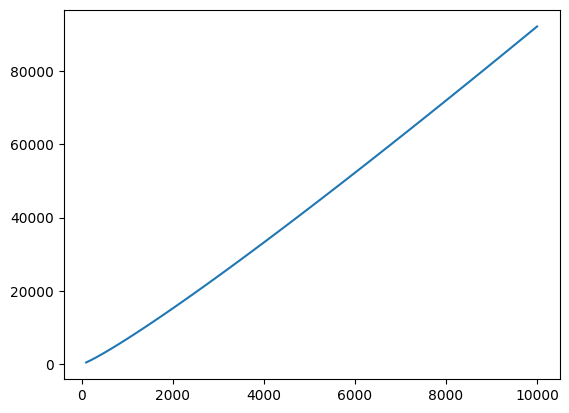

In [9]:
#!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np

# 1. Create a figure of the convex conjugate of the logistic loss function
a = np.linspace(0,1e4,100)
l_conv = a * np.log(a)
plt.plot(a, l_conv)
# 2. Create a figure of the convex conjugate of the hinge loss function



#### 4.

a)

n=100, d=2, reg=0.1, alpha=0.1
n=100, d=2, reg=0.1, alpha=0.2
n=100, d=2, reg=0.1, alpha=0.30000000000000004
n=100, d=2, reg=0.1, alpha=0.4
n=100, d=2, reg=0.1, alpha=0.5
n=100, d=2, reg=0.1, alpha=0.6
n=100, d=2, reg=0.1, alpha=0.7000000000000001
n=100, d=2, reg=0.1, alpha=0.8
n=100, d=2, reg=0.1, alpha=0.9
n=100, d=2, reg=0.1, alpha=1.0
n=100, d=2, reg=5, alpha=0.1
n=100, d=2, reg=5, alpha=0.2
n=100, d=2, reg=5, alpha=0.30000000000000004
n=100, d=2, reg=5, alpha=0.4
n=100, d=2, reg=5, alpha=0.5
n=100, d=2, reg=5, alpha=0.6
n=100, d=2, reg=5, alpha=0.7000000000000001
n=100, d=2, reg=5, alpha=0.8
n=100, d=2, reg=5, alpha=0.9
n=100, d=2, reg=5, alpha=1.0
n=100, d=20, reg=0.1, alpha=0.1
n=100, d=20, reg=0.1, alpha=0.2
n=100, d=20, reg=0.1, alpha=0.30000000000000004
n=100, d=20, reg=0.1, alpha=0.4
n=100, d=20, reg=0.1, alpha=0.5
n=100, d=20, reg=0.1, alpha=0.6
n=100, d=20, reg=0.1, alpha=0.7000000000000001
n=100, d=20, reg=0.1, alpha=0.8
n=100, d=20, reg=0.1, alpha=0.9
n=100, d=20, reg=0.

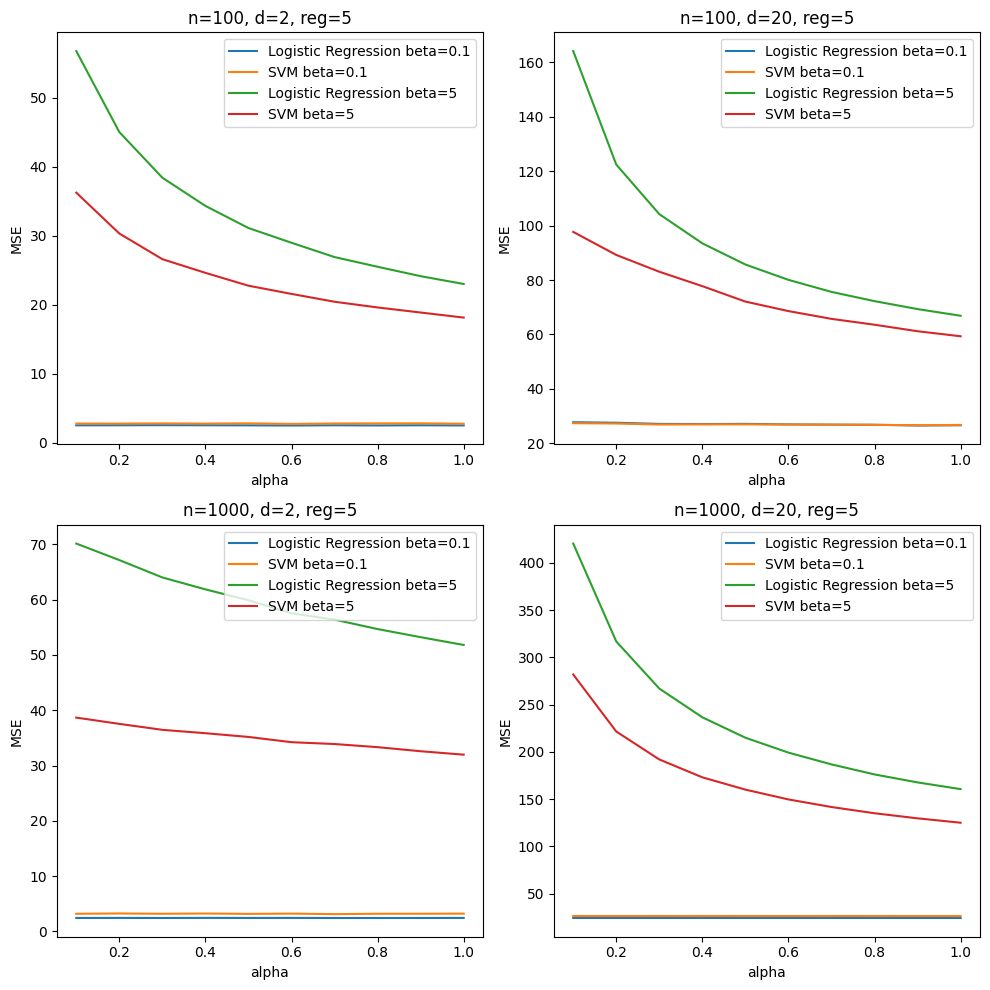

In [5]:
import numpy as np
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

def get_Y(beta, theta0, X):
    Y = []
    for x_i in X:
        t_i = np.matmul(theta0.T, x_i)
        odds = np.exp(beta*t_i)
        Y.append(np.random.choice(a=[-1, 1], size=1, p= [odds/(1+odds), 1/(1+odds)])[0])
    return Y

def error_calc(alpha,n,d,beta):
    theta0=np.ones(d)
    # Write a code that generates a synthetic dataset X,Y
    # X has n rows (number of data points) and d columns (number of features)
    # and Y is a 1-d array with n elements each being -1 or 1
    # each element of X is standard Gaussian
    # for the i element of Y is randomly generated by the
    # description in the pdf file and parameter alpha
    X = np.random.normal(0, 1, size=(n, d))    
    Y = get_Y(beta, theta0, X)
    Y = np.array(Y)
    # print(Y)
    # run svm.SVC with parameters (C=1/alpha,kernel='linear')
    # also run Logisticregression with parameter (C=1/alpha)
    # See: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    # See: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
    if len(np.unique(Y)) == 2:    
        model_LR = LogisticRegression(C=1/alpha)
        model_LR.fit(X=X, y=Y)
        model_SVM = svm.SVC(C=1/alpha, kernel='linear')
        model_SVM.fit(X=X, y=Y)
    else:
        print('Y has only one class this iteration is ignored')
        # sameY += 1
        return None, None

    # read out the coefficients of the trained models
    coef_LR = model_LR.coef_
    coef_SVM = model_SVM.coef_

    # calculate SQUARE L2 norm of the error between the coefficients of each model
    # and theta0, call the error_LR and error_SVM
    error_LR = np.linalg.norm(coef_LR - theta0) ** 2
    error_SVM = np.linalg.norm(coef_SVM - theta0) ** 2

    return error_LR, error_SVM

def avg_risk_calc(reg,n,d,alpha):
    # write a for loop that calculates the error for 1000 times
    # Although the parametrs reg, n,d,alpha are the same, each error is random
    # because the dataset is generated again
    # Calculate the average errors of 1000 runs 
    # You get MSE_LR and MSE_SVM
    errors_LR = []
    errors_SVM = []
    for _ in range(1000):
        error_LR, error_SVM = error_calc(alpha, n, d, reg)
        if error_LR is None or error_SVM is None:
            continue
        errors_LR.append(error_LR)
        errors_SVM.append(error_SVM)
    MSE_LR = np.mean(errors_LR)
    MSE_SVM = np.mean(errors_SVM)
    return MSE_LR, MSE_SVM

# Now using avg_risk_calc function plot the risk function of alpha
# for different values n,d, reg 
n_values = [100, 1000]
d_values = [2, 20]
reg_values = [0.1, 5]

fig, axs = plt.subplots(len(n_values), len(d_values), figsize=(10, 10))

for i, n in enumerate(n_values):
    for j, d in enumerate(d_values):
        for reg in reg_values:
            MSE_LR_values = []
            MSE_SVM_values = []
            alpha_values = np.linspace(0.1, 1, num=10)
            for alpha in alpha_values:
                print(f'n={n}, d={d}, reg={reg}, alpha={alpha}')
                MSE_LR, MSE_SVM = avg_risk_calc(reg, n, d, alpha)
                MSE_LR_values.append(MSE_LR)
                MSE_SVM_values.append(MSE_SVM)
            axs[i, j].plot(alpha_values, MSE_LR_values, label=f'Logistic Regression beta={reg}')
            axs[i, j].plot(alpha_values, MSE_SVM_values, label=f'SVM beta={reg}')
            axs[i, j].set_xlabel('alpha')
            axs[i, j].set_ylabel('MSE')
            axs[i, j].set_title(f'n={n}, d={d}, reg={reg}')
            axs[i, j].legend()
# print(sameY)
plt.tight_layout()
plt.show()
fig.savefig('Code_2.png')

b) 

### <center> Q2. (Expectation Maximization Clustering)

#### 1.


#### 2.

#### 3.

In [ ]:
import numpy as np

def EM_clustering(X,sigma,K):
    # Number of iterations
    iter_num=10
    # d is the number of features and n is the number of the data points:
    (n,d)=X.shape
    # Initialize the K centroids randomly. Each row is a centroid.
    M=np.random.randn(K,d)
    # A vector that stores the NLL value in different iterations:
    value=np.zeros(iter_num)

    #start the EM loop:
    for k in range(iter_num):
        # Apply the E stape by calculating the omega_{i,k} coefficients
        # Apply the M step and obtain an update of M
        # Calculate the NLL vale
        value[k]= ...

    return M, value


#Load the CC General dataset by pandas and keep the numerical part as a
# numpy array X

# Apply EM_clustering(X,sigma,K)
# Plot value vs iterations
# Apply different numbers of clusters and plot the last
# value of NLL (i.e. value[-1]) as the optimal NLL vs the number of clusters


### <center> Q3. (Bregman divergence)

#### 1.

#### 2.

#### 3.